In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve



In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=['Class 0', 'Class 1']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()



Overfitted Tree Train Accuracy: 1.00
Overfitted Tree Test Accuracy: 0.86


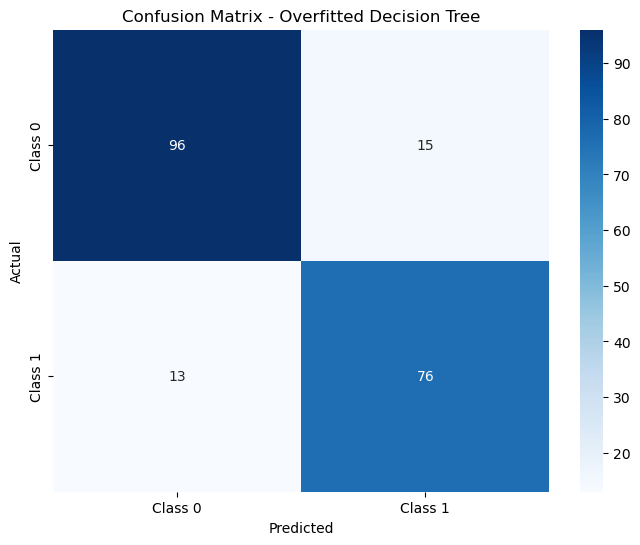

In [3]:
# Train a decision tree classifier (Overfitting example)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Overfitted Tree Train Accuracy: {train_accuracy:.2f}')
print(f'Overfitted Tree Test Accuracy: {test_accuracy:.2f}')
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), title='Confusion Matrix - Overfitted Decision Tree')




Pruned Tree Train Accuracy: 0.96
Pruned Tree Test Accuracy: 0.88


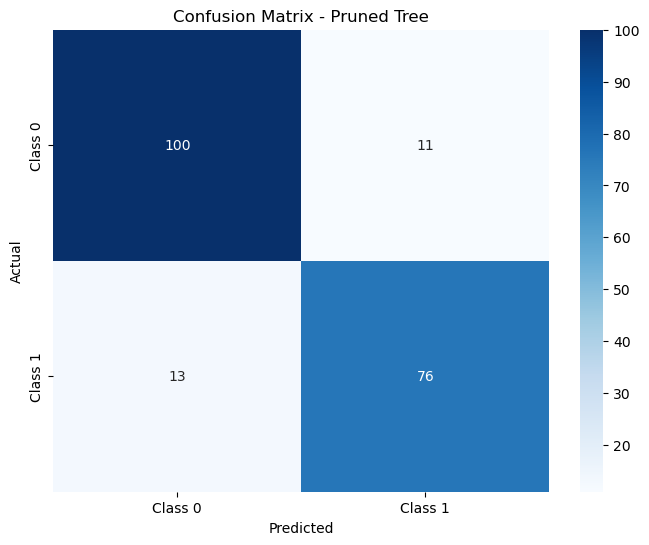

In [4]:
# Prune the decision tree
clf_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_pruned.fit(X_train, y_train)
y_train_pred_pruned = clf_pruned.predict(X_train)
y_test_pred_pruned = clf_pruned.predict(X_test)
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)
print(f'Pruned Tree Train Accuracy: {train_accuracy_pruned:.2f}')
print(f'Pruned Tree Test Accuracy: {test_accuracy_pruned:.2f}')
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred_pruned), title='Confusion Matrix - Pruned Tree')


Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 0.92


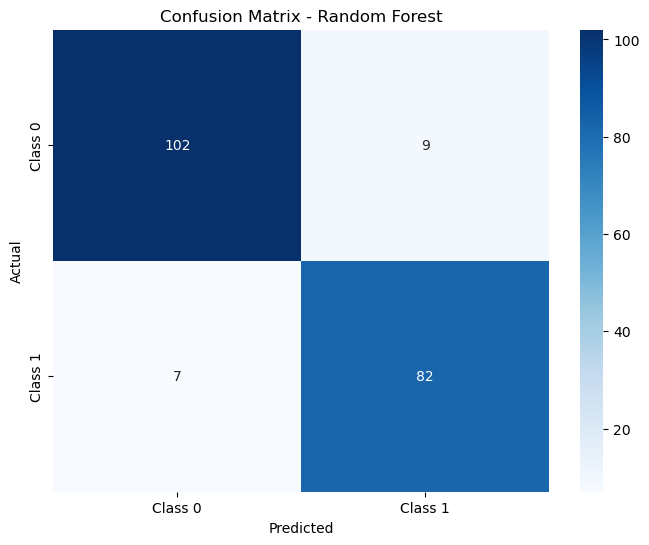

In [5]:
# Train a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Random Forest Train Accuracy: {train_accuracy_rf:.2f}')
print(f'Random Forest Test Accuracy: {test_accuracy_rf:.2f}')
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred_rf), title='Confusion Matrix - Random Forest')



Logistic Regression Train Accuracy: 0.86
Logistic Regression Test Accuracy: 0.88


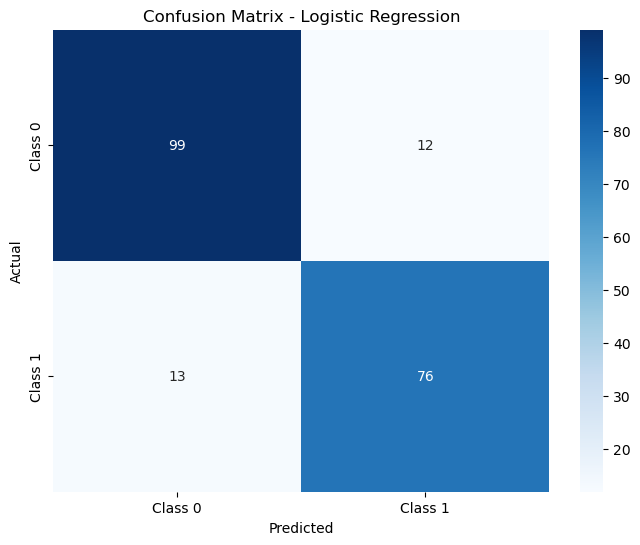

In [6]:
# Train a logistic regression classifier with regularization
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_train_pred_lr = lr_clf.predict(X_train)
y_test_pred_lr = lr_clf.predict(X_test)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f'Logistic Regression Train Accuracy: {train_accuracy_lr:.2f}')
print(f'Logistic Regression Test Accuracy: {test_accuracy_lr:.2f}')
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred_lr), title='Confusion Matrix - Logistic Regression')



In [7]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from '/home/nivedita/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

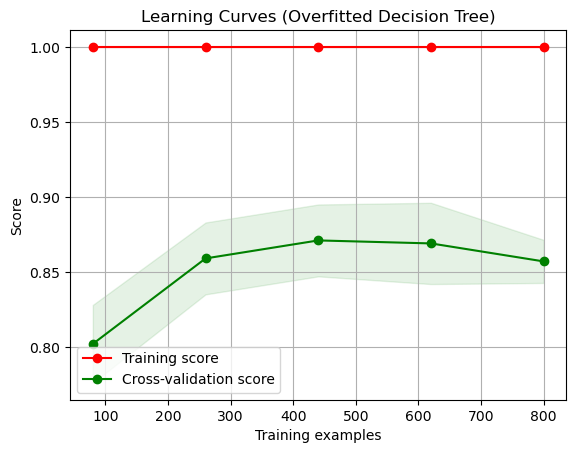

In [9]:
# Plot learning curves
plot_learning_curve(clf, "Learning Curves (Overfitted Decision Tree)", X, y, cv=5)


<module 'matplotlib.pyplot' from '/home/nivedita/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

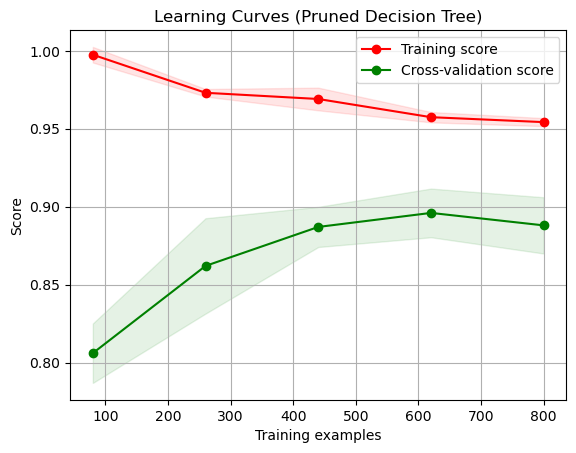

In [10]:
plot_learning_curve(clf_pruned, "Learning Curves (Pruned Decision Tree)", X, y, cv=5)


<module 'matplotlib.pyplot' from '/home/nivedita/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

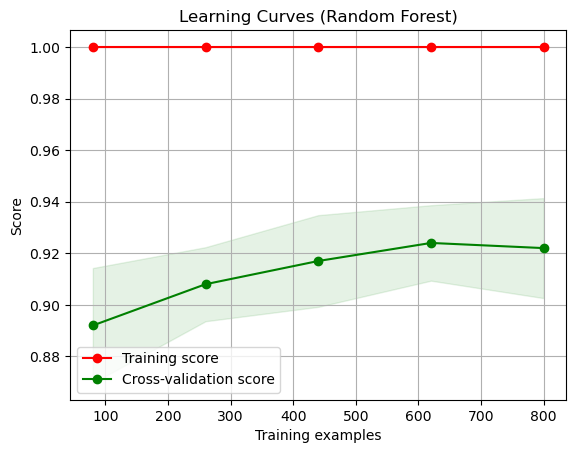

In [11]:
plot_learning_curve(rf_clf, "Learning Curves (Random Forest)", X, y, cv=5)


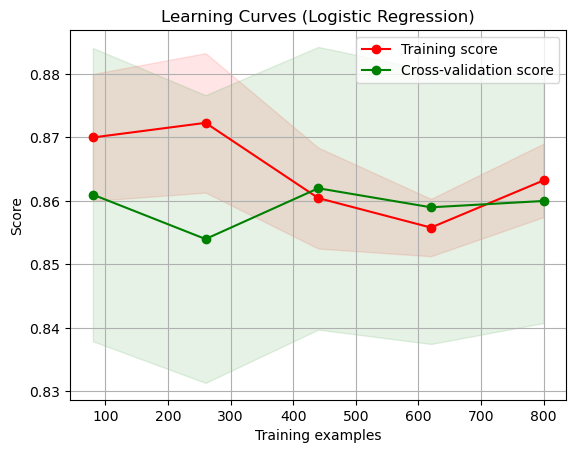

In [12]:
plot_learning_curve(lr_clf, "Learning Curves (Logistic Regression)", X, y, cv=5)
plt.show()
